# CSCI4022 Homework 6; More Graphs and some Recommendations

## Due Friday, April 9 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (15 pts; Coding: PageRank)



Consider the sparsely encoded link matrix in `EVA_Links`.  Each row is an (i, j) link tuple, where the row is included if company i is an owner of company j.  Each to/from integer ID corresponds to an index in the accompanying file `EVA_nodename`.  There is no node name or company indexed `0`, so you'll want to account for that.  There is no header, and the encoding is UTF-8.

#### a) 

Run the PageRank algorithm on this graph to determine the most powerful corporate "owners," so we'll interpret edges as pointing *to* the owning party.  Report the final PageRanks as an ordered ranking of the pages, printing the top 10 **companies**.  Include a teleportation probability of 15%.

with open('data.csv','r') as file:
		reader=csv.reader(file)
		for row in reader:
			print(row)

In [2]:
import csv
dfNodeNames = pd.read_csv ('../Data/EVA_nodename.csv', encoding= 'UTF-8', header=None) #read data in
dfLinks = pd.read_csv ('../Data/EVA_Links.csv', encoding= 'UTF-8', header=None)
nodeNamesList=[]
cnt=1
#nodeNamesList.append("")
with open('../Data/EVA_nodename.csv','r', encoding= 'UTF-8') as file:
        reader=csv.reader(file)
        for row in reader:
            #print(row)
            #if(cnt==0):
            #    print(row[0])
            
            if(len(row)>=1):
                nodeNamesList.append(row[0])
            else:
                nodeNamesList.append("")
            #print(cnt,nodeNamesList[cnt],row)
            cnt+=1
nodeNamesList.append("")

In [3]:
sparceM = {}
for row in dfLinks.iterrows():
    row= row[1]
    #print(row[0],row[1])
    #print(row[1],"owned by",row[0])
    if row[1] not in sparceM.keys(): #was 0 aswell
        sparceM[row[1]]= [row[0]]#sparceM[row[0]]= [row[1]]
    else:
        newL = sparceM[row[1]] #was opposite (0,1,0)for next lines
        newL.append(row[0])
        sparceM[row[1]] = newL
 
        
sparcerM=[]
for key in sparceM.keys():
    
    outLinks = sparceM[key]
    size= len(outLinks)
    subL=[size,outLinks]
    sparcerM.append(subL)

In [4]:
n=len(nodeNamesList)
beta = 0.85
r_old = np.repeat(1/n, n)

refList = list(sparceM.keys())
for t in range(50):#50
    # initialize with the "taxed" importance 
    r_new = np.repeat((1-beta)/n, n)
    #r_new = np.array([(1-beta)/len(S) if p+1 in S else 0 for p in range(n)])
    # distribute importance payments between the nodes
    for page in range(len(sparcerM)):#sparcerM
        for dest in sparcerM[page][1]:
            #print(page,refList[page])
            idx = dest#like 90 % sure no -1 
            r_new[idx] += beta*r_old[refList[page]]/sparcerM[page][0]
    # normalize to ensure r_new sums to 1
    r_new = r_new/np.sum(r_new)
    r_old = r_new
    #print(t)
print(len(r_new),len(sparcerM))
print(np.round(r_new, 4)) 

8498 6316
[0.     0.0023 0.     ... 0.     0.     0.    ]


In [5]:
def printTop10(dic,nodeNamesList):
    cnt=0
    for i in range(10):
        print(i+1,nodeNamesList[dic[i][0]-1],dic[i]) #account for list names at index 0

In [6]:
r_newDict= {i:r_new[i]  for i in range(len(r_new))}
#print(r_newDict)
r_newDictsorted = sorted(r_newDict.items(), key=lambda X: X[1], reverse=True)
#r_newDictsorted


In [7]:
printTop10(r_newDictsorted,nodeNamesList)

1 Alaska Communications System (4977, 0.238147162027508)
2 InterNAP Network Services (5589, 0.05752058789802355)
3 Inktomi (5590, 0.054354219686771094)
4 Rainbow Media Holdings (471, 0.0441077279444145)
5 Cablevision (6, 0.043117812333526864)
6 Harris Computer Systems (5008, 0.02556641952860642)
7 TransWestern (6706, 0.02556641952860642)
8 CNBC (1611, 0.022665079200986316)
9 Comcast (8, 0.020179039824075026)
10 AT&T (4, 0.01952910651180557)


#### b) 

The top 10 pages should include some companies you've heard of, but may also include many you *haven't*.  For those top 10 PageRanks, scan through the edges linking either *to* or *from* those pages and comment on any patterns that seem important.

Do these top few results pass a sanity check, in the context of what those companies do?  

Do they pass a sanity check that may suppor the claim that "PageRank returns the most important ownership structures?"  Why or why not?

In [8]:
top3= [4977,5589,5590]#,471,6,5
top10=[4977,5589,5590,471,6,5,5008,6706,1611,8,4] #--commented out easier to see patterns with less
for ownedBy in sparceM.keys():
    
    for owner in sparceM[ownedBy]:
        if(owner in top10): #top3 easier to see patterns with less
            print(owner,"owns",ownedBy) # --easier to see patterns through number
            
            #print(nodeNamesList[ownedBy-1],"owned by",nodeNamesList[owner-1]) # print by name of companies

6 owns 4
471 owns 6
4 owns 8
8 owns 8
8 owns 30
4 owns 161
4 owns 163
4 owns 164
4 owns 166
8 owns 166
4 owns 167
4 owns 170
8 owns 170
8 owns 220
8 owns 275
4 owns 289
4 owns 307
4 owns 309
4 owns 310
4977 owns 310
4 owns 311
4 owns 312
4 owns 313
4 owns 314
4 owns 315
4 owns 316
4 owns 318
4 owns 319
4 owns 320
4 owns 321
4 owns 322
4 owns 323
4 owns 324
4 owns 325
4 owns 327
4 owns 328
5 owns 338
5 owns 348
5 owns 352
5 owns 368
5 owns 369
5 owns 370
5 owns 371
5 owns 372
5 owns 373
5 owns 374
5 owns 375
5 owns 376
5 owns 377
5 owns 378
5 owns 379
5 owns 380
5 owns 381
5 owns 382
5 owns 383
5 owns 384
5 owns 385
5 owns 386
5 owns 387
5 owns 388
5 owns 389
5 owns 390
5 owns 391
5 owns 392
5 owns 393
5 owns 394
5 owns 395
5 owns 396
5 owns 397
5 owns 398
5 owns 399
5 owns 400
5 owns 401
5 owns 402
5 owns 403
5 owns 404
5 owns 405
5 owns 406
5 owns 407
5 owns 408
5 owns 423
5 owns 424
5 owns 425
5 owns 426
5 owns 427
5 owns 428
5 owns 429
5 owns 430
5 owns 431
5 owns 432
5 owns 433
5 o

I do not think the top few results pass the sanity check it looks like a spam farm as Alaska Communications is owned by themselves. Even though Alaska Communications System owns alot of alaska based stuff the link to itself is why it is ranked 1st. Same with InterNAP Network Services and Inktomi except they are pointing to each owning the other, resulting again with stealing importance. This trend of partial ownership, owning themselve continues as we move further down the top 10. Take AT&T and CNBC for example they are partial owners of the 4th rank of ranbow media holdings. This does not support the claim that pageRank returns the most important ownership structeres as these are not the true top results(I do not think). I would be more in support of a TrustRank only teleporting to a trusted set instead of any.

-------------------------------------------------------------------------------
Source on data set:

 UF Sparse Matrix Collection, Tim Davis
 
 http://www.cise.ufl.edu/research/sparse/matrices/Pajek/EVA
 
 name: Pajek/EVA

 date: 2002
 
 author: K. Norlen, G. Lucas, M. Gebbie, J. Chuang
 
ed: V. Batagelj

-------------------------------------------------------------------------------



***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Graph Cuts; 20 pts) 
Suppose our graph is given below:

C:\Users\johno\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


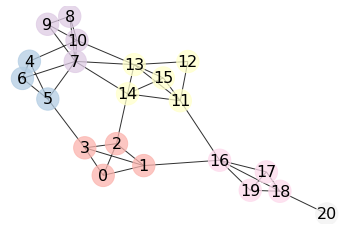

In [9]:
#manual edge assignments
edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],[17,18],\
      [1,16],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16],[18,20]]
#create a dictionary as option
nodes = list(range(21))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)

#networkx to plot the graph
G=nx.Graph()
nodes=[i for i in range(21)]
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

#plot the graph
np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
labels=dict(zip(range(21),range(21))); #label 0-20
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.8); #draw edges
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
plt.axis("off");


Loosely speaking, the data is generated from 5 clusters, although 2 clusters overlap somewhat.

### Part 1:
Find the Fiedler vector for the graph.  Plot the sorted Fiedler vector.  Use the `edges` array defined above.


In [10]:
A=[]
for key in neighbors.keys():
    A_row= [0]*N
    
    for neighbor in neighbors[key]:
        A_row[neighbor]=1
    #print(neighbors[key],A_row)
    A.append(A_row)
A= np.array(A)

# degree matrix
D = np.diag([np.sum(A[k,:]) for k in range(A.shape[0])])

# graph laplacian matrix
L = D - A
#print(L)

In [11]:
evals, evecs = np.linalg.eig(L)

evals_sorted = np.sort(evals)


idx_x2 = list(evals).index(evals_sorted[1])
x2 = evecs[:,idx_x2]
print(x2)

[ 0.01642566 -0.0349411   0.03244024  0.04768687  0.20062615  0.16494581
  0.19620702  0.17418184  0.20842491  0.20842491  0.19075774  0.03151556
  0.08346167  0.11462084  0.09250996  0.08675083 -0.22761475 -0.3480656
 -0.38182734 -0.3480656  -0.50846563]



### Part 2: Partitions

#### Part 2a:

Partition the graph into 2 graphs using this vector.  Include a picture of the associated *cut* of the graph.


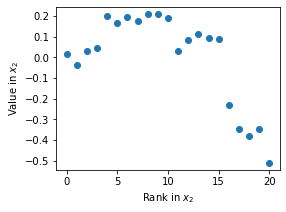

In [12]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.scatter(list(range(N)), x2)
plt.xlabel('Rank in $x_2$')
plt.ylabel('Value in $x_2$');

For Fiedler vector always cut at zero for bipartition, hence will cut [1,16] and [11,16]

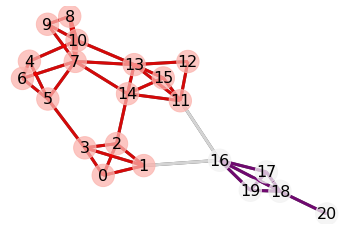

In [13]:
def plot(edges,edgeListofList,colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5]): #made in to function from above code to display cuts
    #create a dictionary as option
    nodes = list(range(21))
    neighbors={key: [] for key in range(len(nodes))} 
    for edge in edges:
        neighbors[edge[0]].append(edge[1])
        neighbors[edge[1]].append(edge[0])

    #other useful variables
    nodes = list(range(21))
    N = len(nodes)

    #networkx to plot the graph
    G=nx.Graph()
    nodes=[i for i in range(21)]
    G.add_nodes_from(nodes)
    for i in range(len(edges)):
        G.add_edge(edges[i][0],edges[i][1]) #here add color  from a color diction of edges

    #plot the graph
    np.random.seed(6) #graph plotting algorithm is random; this ensures same image each time
    pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations
    #colors=[0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,4,4,4,4,5] #manual "family" groupings
    labels=dict(zip(range(21),range(21))); #label 0-20
    nx.draw_networkx_nodes(G, pos, node_color=colors, cmap='Pastel1', node_size=500, alpha=.75); #node colors easy to see labels over
    nx.draw_networkx_edges(G, pos, width=3.0, alpha=0.8);
    for i in range(len(edgeListofList)):#first color should be to white out edges
        if(i==0):
            nx.draw_networkx_edges(G, pos, width=3.0, alpha=0.8,edge_color="w",edgelist=edgeListofList[i]);
        else:
            color=["red","purple","blue"]
            nx.draw_networkx_edges(G, pos, width=3.0, alpha=0.8,edge_color=color[i-1],edgelist=edgeListofList[i]);
     #   nx.draw_networkx_edges(G, pos, width=3.0, alpha=0.8,edge_color="r",edgelist=edgeListofList[i]); #draw edges
    nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
    plt.axis("off");
    
    
    

edgesToWhiteOut= [[1,16],[11,16]]
split1= [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15]]
split2=[[16,17],[16,18],[16,19],[17,19],[18,19],[17,18],[18,20]]
t=[edgesToWhiteOut,split1,split2]

plot(edges,t,colors=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1])

Note: The "white edges denote the ones that are "cut",hence two separate graphs. Same for 2b and 2c.


#### Part 2b:

Partition the graph into 3 subgraphs using the Fiedler vector.  One natural way to do so is to partitition at the two largest 1-D **jumps** in the sorted vector instead of just one cut at $y=0$.  Include both associated *cuts* in another picture of the graph.

In [14]:
bigJumps={}
for i in range(1,len(x2)):
    x_idx = i-1
    y_idx = i
    diff = abs(x2[x_idx]-x2[y_idx])
    bigJumps[(x_idx,y_idx)]=diff
    #print(x_idx,y_idx,abs(x2[x_idx]-x2[y_idx]))
bigJumpsSort = sorted(bigJumps.items(), key=lambda X: X[1], reverse=True)
bigJumpsSort
print("Biggest two jumps: ")
print(bigJumpsSort[0])
print(bigJumpsSort[1])

Biggest two jumps: 
((15, 16), 0.31436558017275834)
((19, 20), 0.16040003261555053)


Going by largetst 1-d jumps we shall cut  [1, 16], [11, 16],[18, 20]

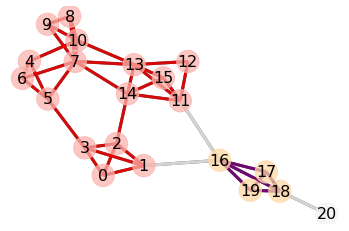

In [15]:
edgesToWhiteOut= [[1,16],[11,16],[18,20]]
split1= [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],[2,14],[3,5],[5,7],[6,7],[4,10],[10,13],[7,13],[7,14],[13,15]]
split2=[[16,17],[16,18],[16,19],[17,19],[18,19],[17,18]]
t=[edgesToWhiteOut,split1,split2]
plot(edges,t,colors=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2])



### Part 2c:

Partition the graph into 4 subgraphs using bipartitioning.


Using the same logic from part 2a,are first cut would be at 0, and then I am gonna go by biggest jump as there is only 1 split at 0. 

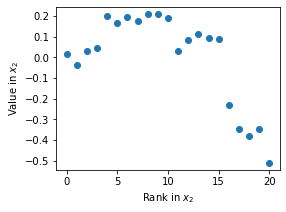

In [16]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.scatter(list(range(N)), x2)
plt.xlabel('Rank in $x_2$')
plt.ylabel('Value in $x_2$');

In [17]:
print("Biggest two jumps after split at 0: ")
#print(bigJumpsSort[0])
print(bigJumpsSort[1])
print(bigJumpsSort[2])

Biggest two jumps after split at 0: 
((19, 20), 0.16040003261555053)
((10, 11), 0.15924217972223523)


After looking at biggest jumps list we calculated last time the edges to cut would be at  [1, 16], [11, 16],[18, 20],[10,13],[7,12],[7,14],[2,14]

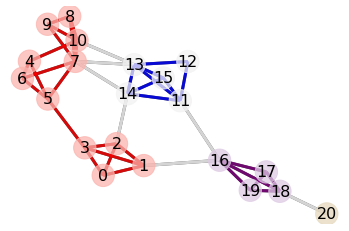

In [18]:
edgesToWhiteOut= [[1,16],[11,16],[18,20],[10,13],[7,13],[7,14],[2,14]]
split1= [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],[9,10],\
      [3,5],[5,7],[6,7],[4,10]]
split2=[[16,17],[16,18],[16,19],[17,19],[18,19],[17,18]]
split3=[[11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],[13,15]]
t=[edgesToWhiteOut,split1,split2,split3]
plot(edges,t,colors=[0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,1,1,1,1,2])


### Part 2d:

Of the 3 partitions above, which do you think were most appropriate.  Why?


Out of the 3 partitions, I think the most appropriate subgraph is from 2b. As I think the each subgraph in 2b is either more interconnected or have the same amount of connections as 2a or 2c. As it is always best to minimize the amount of cuts as it would support keeping the most connections.

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (10 pts; Theory: Network MLEs)

Suppose graphs are generated by picking a probability $p$ and choosing each edge independently with probability $p$, as if our entire network were coming from a Community Affiliation Graph Model (AGM) with only *one*  universal community.

What value of $\hat{p}$ gives the maximum likelihood of seeing a specific graph with $n$ total nodes and $e$ total edges? What is the probability that your observed, specific graph is the one generated, if $p=\hat{p}$?

Since it is one universal community, it reduces the problem. The first thing is with n total nodes we will have n choose2 edges with each there own probability p.

$\hat{p}= \prod_{i = 1}^{e} P(u,v)_{\texttt{prob edge between u,v}} \prod_{i = 1}^{e} (1-P(u,v)_{\texttt{prob not edge between u,v}})$, where u,v are nodes in the specific graph

In an AGM with one community, $P(u,v)_c= 1- p $ , with p being probability there is an edge between u and v.
$P(u,v)== P(u,v)_c$ since there is only 1 community

$1- \prod_{\texttt{each Community(only one)}} (1- p_c)$ ,where $p_c$ represents the probability community contains that edge\
, which reduces $P(u,v)= 1- (1- p)= p$ \
*Now subbing that back in to the original equation* \
$\hat{p}= \prod_{i = 1}^{e} p \prod_{i = 1}^{e} (1-p) $\
*Now using logs* \
$\to ll(\hat{p}) = log( \sum_{i = 1}^{e} p + \sum_{i = 1}^{e} (1-p) )$ \
$\to ll(\hat{p}) = \sum_{i = 1}^{e} log( p) + \sum_{i = 1}^{e} log((1-p)) $ \
*Now to find maximum we will take derivative in regards to p* \
$\frac{d}{dp} (ll(\hat{p})) =  \sum_{i = 1}^{e} \frac{d}{dp} (log( p)) + \sum_{i = 1}^{e}  \frac{d}{dp} (log(1-p)) $\
*set other side equal to zero* \
$\to 0 =  \sum_{i = 1}^{e} \frac{d}{dp} (log( p)) + \sum_{i = 1}^{e}  \frac{d}{dp} (log(1-p)) $\
$\to 0 =  \sum_{i = 1}^{e} \frac{1}{p} + \sum_{i = 1}^{e}  \frac{1}{1-p} $\
$\to 0 =  \sum_{i = 1}^{e} \frac{1}{p} + \sum_{i = 1}^{e}  \frac{1}{1-p} $\
$\to 0 =  e \times(\frac{1}{p} +   \frac{-1}{1-p} ) $\
$\to 0 =  \frac{e}{p} +   \frac{-e}{1-p}  $ <br> 
$\to 0 =  \frac{e}{p} -   \frac{e}{1-p}  $  ,we can see it is a ratio but solving p we get...<br>
$\to \frac{e}{1-p}=  \frac{e}{p}  $ <br>
$\to 1-p=  p  $ <br>
$\to 1=  2p  $ <br>
$\to \hat{p}= \frac{1}{2}  $ <br>



If $p=\hat{p} $ I believe p is the ratio between edges and non edges multiplied by the number of edges. (I am still not completely sure if I solved the end portion correctly - I mean it is a fraction/porportion. )